In [54]:
rm(list = ls())
library(outliers)
library(ggplot2)
library(mosaic)
library(stats)
set.seed(1)

In [ ]:
data(package = .packages(all.available = TRUE))

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,285,337.6625,403.225,443.675,593.7,392.5333,56.60597,1074,34


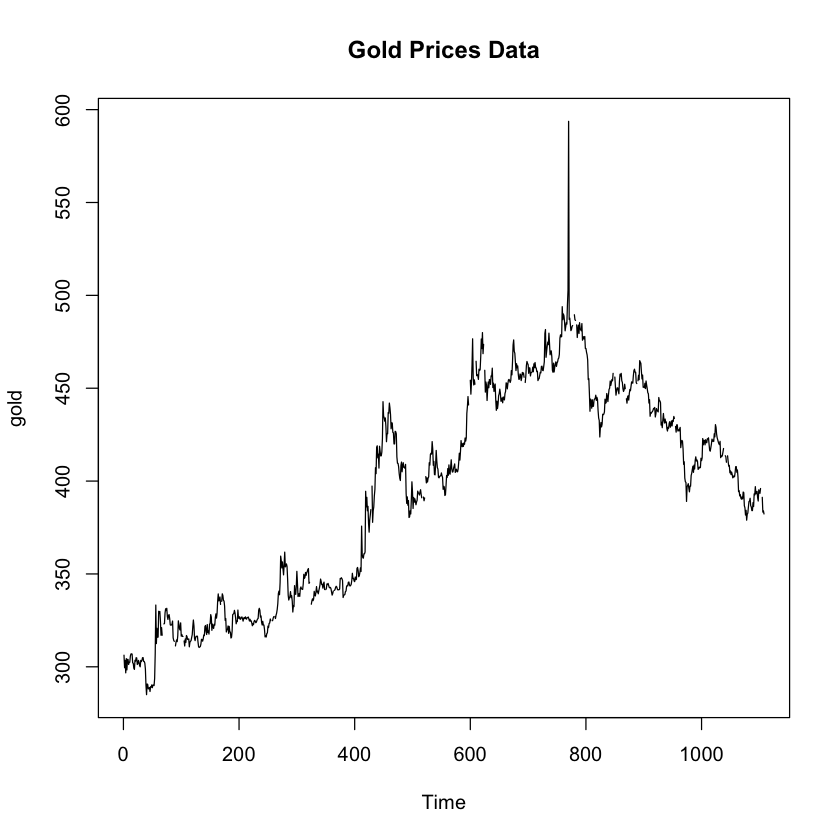

In [130]:
data(gold, package='forecast')
plot.ts(gold, main = "Gold Prices Data")
favstats(gold)

Hmm, I guess this looks semi-normal with some skewness to the right. Just to be double sure, let's see some normal data...

Warning message:
“Removed 34 rows containing non-finite values (stat_boxplot).”


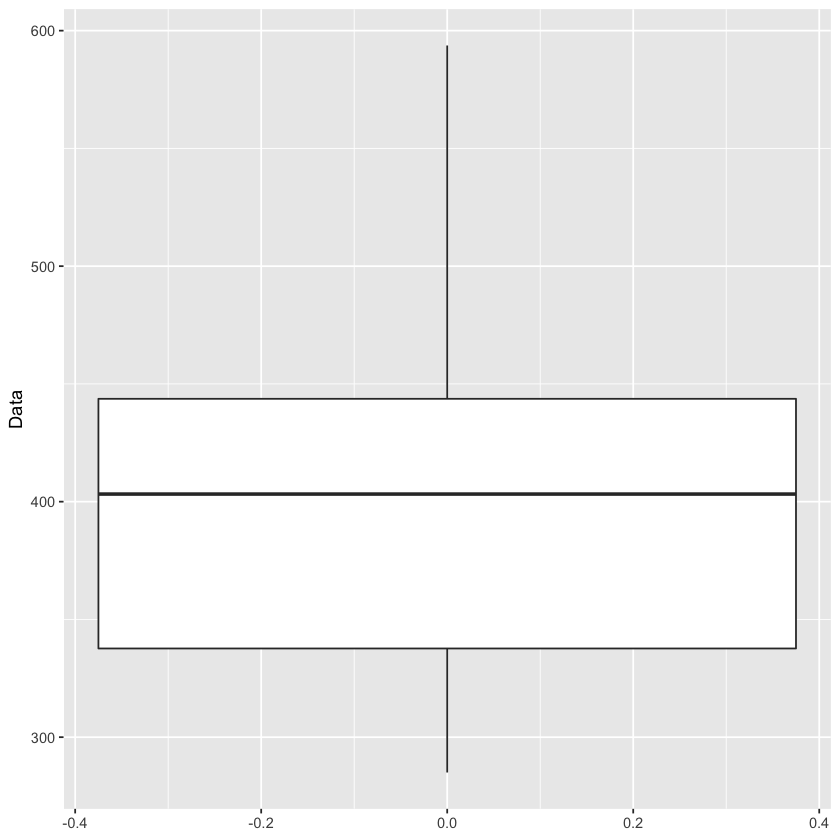

In [110]:
# A box-and-whisker plot should show any outliers clearly
df <- data.frame(Data=as.vector(gold))
ggplot(df, aes(y=Data)) + geom_boxplot()

That upper whisker is not indicating a clear outlier, which would be a dot past the end of the whisker, but my gut is still telling me that the spike to nearly 600 in the above timeseries plot is an outlier. One great method of finding outliers is using a grubbs test! The only problem is that the grubbs test expects the data to be normally distributed. Let's check out if our data is close to a normal distribution

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,-2.786015,-0.5789328,-0.003405082,0.7091181,2.674871,0.03164366,1.081341,100,0


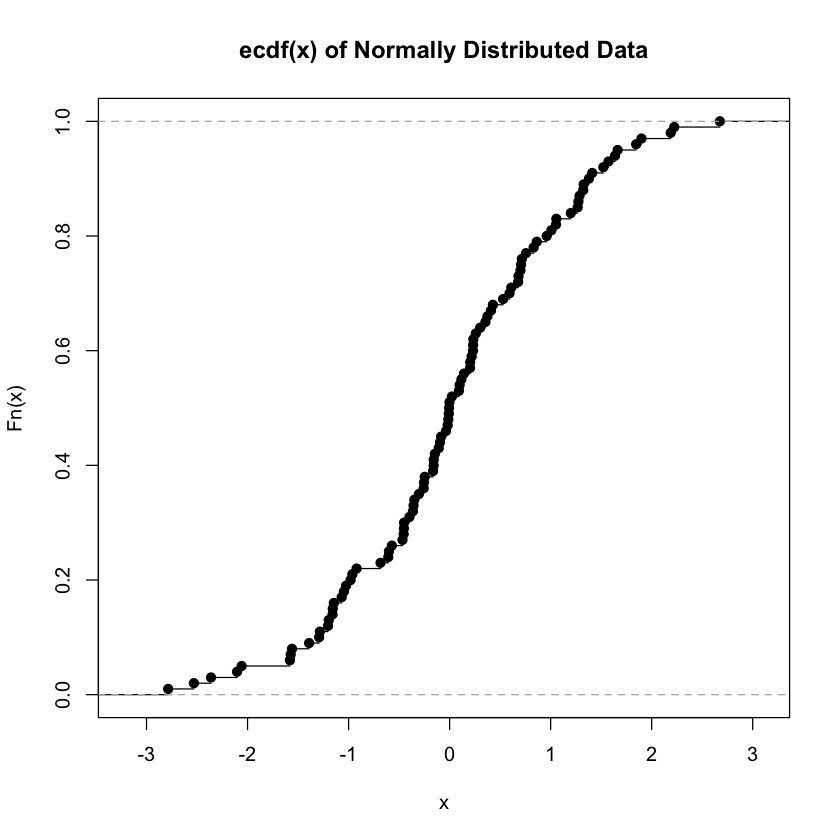

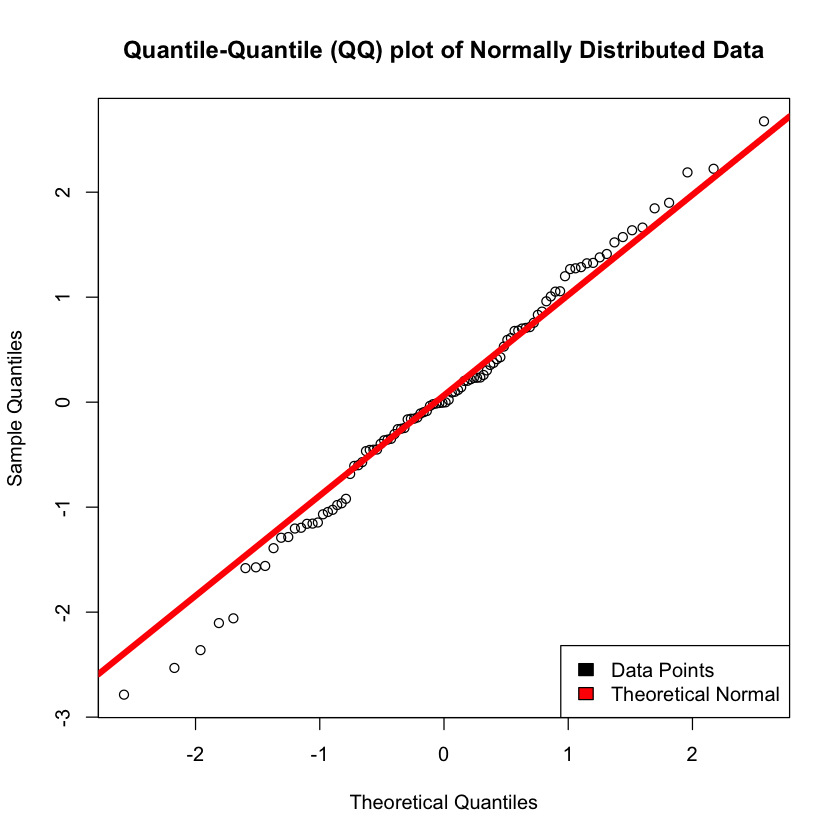

In [126]:
# What the heck does normal data look like
random_normal_data <- rnorm(100)

favstats(random_normal_data)
plot.ecdf(random_normal_data, main = 'ecdf(x) of Normally Distributed Data')
qqnorm(random_normal_data, main = 'Quantile-Quantile (QQ) plot of Normally Distributed Data')
qqline(random_normal_data, col = "red", lwd = 5)
legend("bottomright", c("Data Points", "Theoretical Normal"), fill=c("black", "red"))

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,285,337.6625,403.225,443.675,593.7,392.5333,56.60597,1074,34


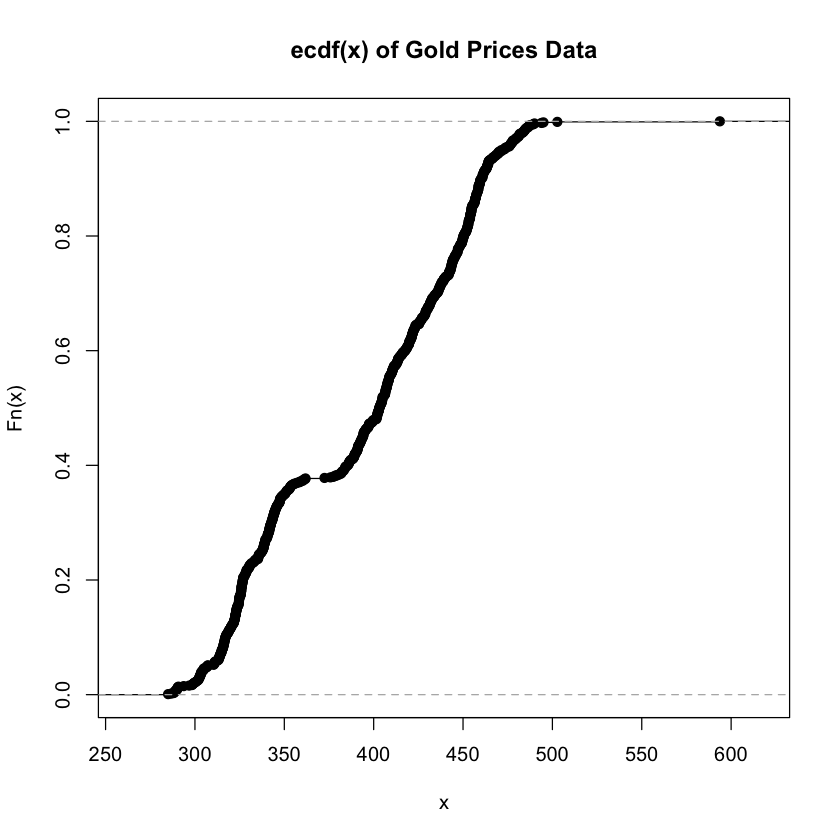

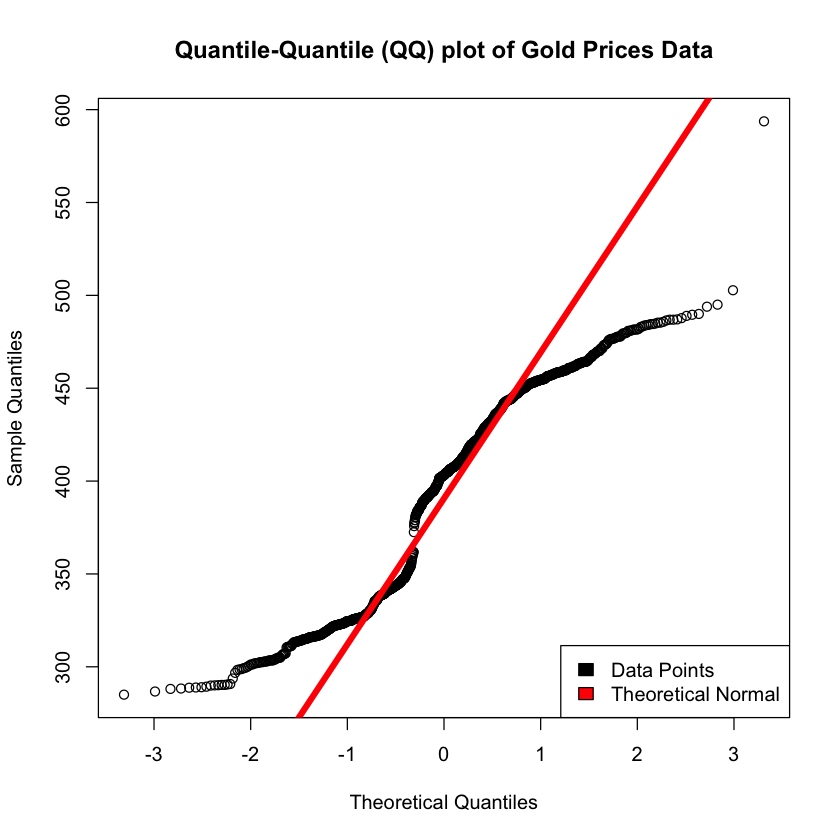

In [127]:
favstats(gold)

# Does our data look normally distributed?
plot.ecdf(gold, main = 'ecdf(x) of Gold Prices Data')
qqnorm(gold, main = 'Quantile-Quantile (QQ) plot of Gold Prices Data')
qqline(gold, col = "red", lwd = 5)
legend("bottomright", c("Data Points", "Theoretical Normal"), fill=c("black", "red"))

It's important to note that a grubbs test expects normality, and as the data isn't strictly normal there can be some concerns about the validity of the results.

In [128]:
grubbs.test(gold, type = 10)


	Grubbs test for one outlier

data:  gold
G = 3.55381, U = 0.98822, p-value = 0.1965
alternative hypothesis: highest value 593.7 is an outlier


### Grubbs Results

So it looks like we do have an outlier, with a resonable p-value of 0.1965. The important thing here is to ask ourselves if that outlier is an error in the data, or if it is valuable data that needs to be included in our models to make them more realistic to real-world. For the purposes of this example, we're going to simply assume that there was a one-day run on gold that is not likely to occur again and is not representative of our dataset as a whole.

,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,285,337.6625,403.225,443.675,593.7,392.5333,56.60597,1074,34


,min,Q1,median,Q3,max,mean,sd,n,missing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
,285,337.6,403.1,443.6,502.75,392.3459,56.29777,1073,34


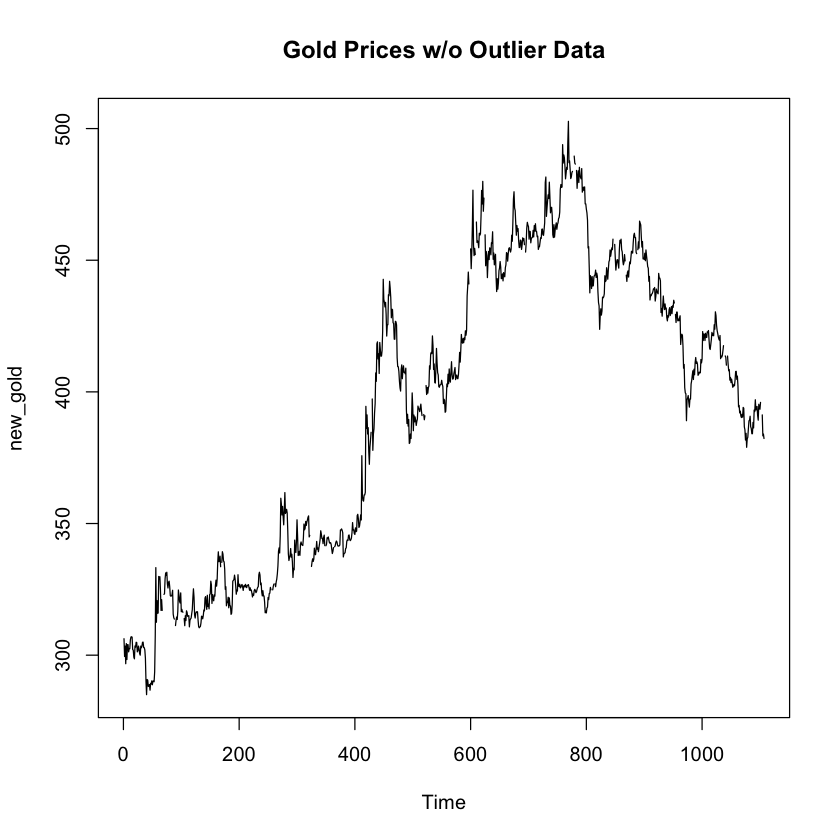

In [134]:
# Let's go ahead and remove that max value we think is the outlier
new_gold <- gold[-which.max(gold)]

# Let's compare the old summary to the new summary
favstats(gold)
favstats(new_gold)

# Lastly, let's take a look at the timeseries plot again
plot.ts(new_gold, main = "Gold Prices w/o Outlier Data")

In [135]:
grubbs.test(new_gold, type = 10)


	Grubbs test for one outlier

data:  new_gold
G = 1.96107, U = 0.99641, p-value = 1
alternative hypothesis: highest value 502.75 is an outlier


### Findings

With the max value of the data set removed, we can see that the timeseries plot no longer includes a spike right at the top. The results from the grubbs test on the new dataset omiting the max value n olonger shows a suspected outlier at the upper threashold of the data. I'd say our work here is done!